The principle of projection onto the orthogonal complement is central to how the spatial Interference Canceling Matched Filter (ICMF) and the LMMSE filter work in this context.

### Understanding the Orthogonal Projection

When dealing with vectors $ \mathbf{h} $ and $ \mathbf{h}^\perp $ in a vector space, $ \mathbf{h}^\perp $ represents the subspace that is orthogonal to $ \mathbf{h} $. Here's a deeper look at what happens:

1. **Orthogonal Complement**: $ \mathbf{h}^\perp $ is defined such that any vector in this subspace is orthogonal to any vector in the subspace spanned by $ \mathbf{h} $. Mathematically, for any vector $ \mathbf{v} $ in the subspace of $ \mathbf{h} $, the dot product $ \mathbf{h}^{\perp H} \mathbf{v} = 0 $. This orthogonality condition implies that there is no projection of $ \mathbf{h} $ onto $ \mathbf{h}^\perp $ and vice versa.

2. **Application in Filters**:
   - **Spatial Matched Filter** $ \mathbf{h}^H $: This filter projects the received signal $ \mathbf{y}[k] $ onto the direction of $ \mathbf{h} $, effectively extracting the component of the signal that aligns with $ \mathbf{h} $. This component is assumed to carry the desired signal $ d[k] $.
   - **Orthogonal Complement Filter** $ \mathbf{h}^{\perp H} $: This filter projects $ \mathbf{y}[k] $ onto the space orthogonal to $ \mathbf{h} $. The output $ \mathbf{x}[k] $ contains components of the received signal that are orthogonal to $ \mathbf{h} $, primarily capturing noise and any other signal components not aligned with $ \mathbf{h} $.

3. **Noise and Signal Separation**: The use of these orthogonal projections helps separate the desired signal from noise and interference. The orthogonal projection ensures that the interference captured by $ \mathbf{h}^{\perp H} $ does not affect the output of $ \mathbf{h}^H $, thus enhancing the purity of the desired signal extraction.

### LMMSE Filter in the Context of Orthogonal Projection

In the LMMSE filter:
$ \mathbf{f}^o = (\mathbf{h}^H R_{\mathbf{VV}} \mathbf{h}^\perp) (\mathbf{h}^{\perp H} R_{\mathbf{VV}} \mathbf{h}^\perp)^{-1} $

- The matrix $ \mathbf{h}^H R_{\mathbf{VV}} \mathbf{h}^\perp $ essentially tries to find a transformation that aligns the noise and interference (filtered through $ \mathbf{h}^{\perp} $) with the desired signal direction ($ \mathbf{h} $), but due to orthogonality, this ideally becomes zero indicating no alignment. If not zero, it corrects for any residual correlations due to imperfect orthogonalization or system modeling errors.
- The inversion of $ \mathbf{h}^{\perp H} R_{\mathbf{VV}} \mathbf{h}^\perp $ calculates the effective filter that needs to be applied to $ \mathbf{x}[k] $ to optimally estimate $ d[k] $ while minimizing error caused by noise and other orthogonal interference.

Thus, the projection onto the orthogonal complement is not just a separation technique but also a way to optimize the estimation of the desired signal in the presence of noise and interference by minimizing cross-coupling and enhancing the desired signal's purity.

In [1]:
using LinearAlgebra

In [2]:
# Function to calculate projection
function projection(v, u)
    return ((v ⋅ u) / (u ⋅ u)) * u
end

projection (generic function with 1 method)

In [3]:
# Define a 2-dimensional signal vector (example)
signal = [3, 4]

# Define a vector h that represents our desired direction
h = [1, 0]

# Compute the orthogonal complement of h
# For simplicity in 2D, if h = [a, b], then h_perp can be [-b, a] or [b, -a]
hꜜ = [0, 1]

2-element Vector{Int64}:
 0
 1

In [4]:
# Calculate projections
projection_h = projection(signal, h)
projection_hꜜ = projection(signal, hꜜ)

2-element Vector{Float64}:
 0.0
 4.0

In [5]:
# Output the results
println("Original Signal: ", signal)
println("Projection onto h: ", projection_h)
println("Projection onto h_perp: ", projection_hꜜ)
println("Reconstructed Signal: ", projection_h + projection_hꜜ)

Original Signal: [3, 4]
Projection onto h: [3.0, 0.0]
Projection onto h_perp: [0.0, 4.0]
Reconstructed Signal: [3.0, 4.0]


In [6]:
using Plots
using LaTeXStrings

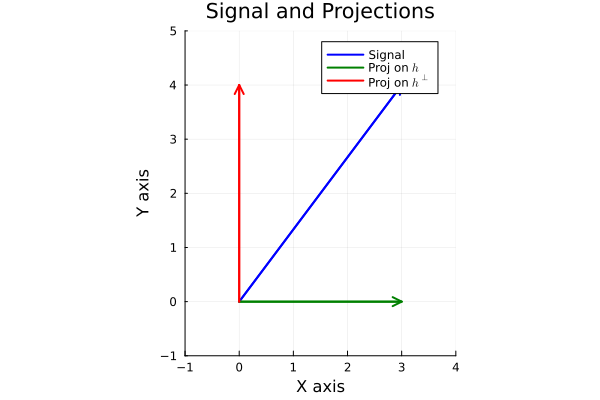

In [7]:
# Plot the original signal
plot([0, signal[1]], [0, signal[2]], label="Signal", arrow=true, linewidth=2, color=:blue)

# Plot projection onto h
plot!([0, projection_h[1]], [0, projection_h[2]], label=L"Proj on $h$", arrow=true, linewidth=2, color=:green)

# Plot projection onto h_perp
plot!([0, projection_hꜜ[1]], [0, projection_hꜜ[2]], label=L"Proj on $h^\perp$", arrow=true, linewidth=2, color=:red)

# Enhance plot features
plot!(
      xlim=(-1, 4), ylim=(-1, 5)
    , xlabel="X axis", ylabel="Y axis"
    , title="Signal and Projections", legend=:topright, aspect_ratio=:equal
)

In [8]:
using Plots
using FFTW
using LaTeXStrings

In [9]:
include("operations.jl")

norm (generic function with 15 methods)

U = [1 0; 0 1; 0 0]
(Q, R) = (LinearAlgebra.QRCompactWYQ{Float64, Matrix{Float64}, Matrix{Float64}}([1.0 0.0; 0.0 1.0; 0.0 0.0], [0.0 0.0; 2.683926108e-314 0.0]), [1.0 0.0; 0.0 1.0])


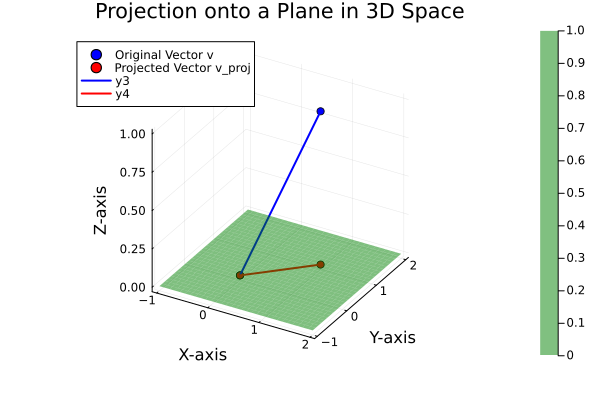

In [10]:
# Define two basis vectors for the plane
u1 = [1, 0, 0]   # First basis vector in the plane
u2 = [0, 1, 0]   # Second basis vector in the plane

# Create a matrix whose columns are u1 and u2
U = [u1 u2]; @show U

# Define a vector to be projected
v = [1, 1, 1]  # Choosing a vector not lying entirely in the plane

# Calculate the orthogonal basis for the plane
Q, R = qr(U); @show Q, R

# Normalize the basis to ensure they are orthonormal
Q = Matrix(Q[:, 1:2])  # Only take the relevant columns

# Calculate the projection matrix onto the subspace spanned by u1 and u2
P = Q * Q'

# Project v onto the subspace
v_proj = P * v

# Visualize the results
plot()
scatter3d!([0, v[1]], [0, v[2]], [0, v[3]], label="Original Vector v", color=:blue, markersize=4)
scatter3d!([0, v_proj[1]], [0, v_proj[2]], [0, v_proj[3]], label="Projected Vector v_proj", color=:red, markersize=4)

# Draw the original and projected vectors
plot!([0, v[1]], [0, v[2]], [0, v[3]], color=:blue, linewidth=2, arrow=true)
plot!([0, v_proj[1]], [0, v_proj[2]], [0, v_proj[3]], color=:red, linewidth=2, arrow=true)

# Define the plane using a surface
x_vals = -1:0.1:2
y_vals = -1:0.1:2
z = zeros(length(x_vals), length(y_vals))
# z = -1:0.1:2
surface!(x_vals, y_vals, z
    , color=:green, label="Plane spanned by u1 and u2", alpha=0.5
)

xlabel!("X-axis")
ylabel!("Y-axis")
zlabel!("Z-axis")
title!("Projection onto a Plane in 3D Space")


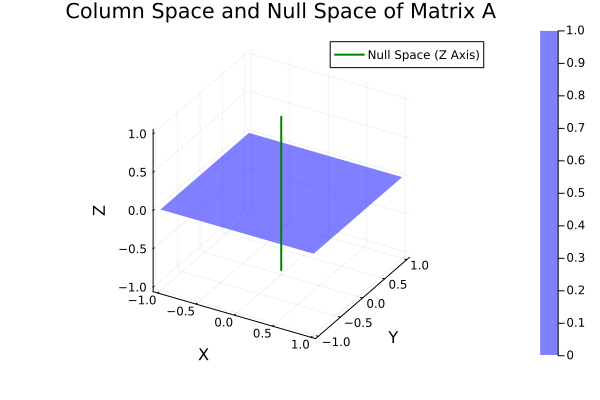

In [11]:
using LinearAlgebra
using Plots

# Define the matrix A
A = [1 0 0; 0 1 0; 0 0 0]

# Compute null space of A
null_space_A = nullspace(A)

# Setup a 3D plot
plot(title="Column Space and Null Space of Matrix A", xlabel="X", ylabel="Y", zlabel="Z", legend=:topright)

# Column space is the XY-plane
# Define a grid for the XY-plane
x_vals = [-1, 1]
y_vals = [-1, 1]
z_vals = zeros(2, 2)  # A 2x2 grid of zeros to keep the plane at z = 0

# Plot the XY-plane
surface!(x_vals, y_vals, z_vals
    , color=:blue, alpha=0.5, label="Column Space (XY Plane)"
)

# Column space is the YZ-plane
# Define a grid for the YZ-plane
# y_vals = zeros(2, 2)  # A 2x2 grid of zeros to keep the plane at z = 0
# x_vals = [-1, 1]
# z_vals = [-1, 1]

# # Plot the XY-plane
# surface(x_vals, y_vals, z_vals
#     , color=:blue, alpha=0.5, label="Column Space (XY Plane)"
# )


# Null space is along the Z-axis
# Define line for the Z-axis
z_line_t = -1:0.1:1
z_line_x = zeros(length(z_line_t))
z_line_y = zeros(length(z_line_t))
z_line_z = z_line_t
plot!(z_line_x, z_line_y, z_line_z
    , color=:green, linewidth=2, label="Null Space (Z Axis)"
)

# Show the plot
# display(plot())


$Ax = b \text{ overdetermined write } b = b_{proj_{cell(A)}} + (b - b_{proj_{cell(A)}})$

In the context of linear algebra, the given expression $Ax = b$ being described as overdetermined implies that there are more equations than unknowns in the system represented by $A$. Typically, this happens when the matrix $A$ has more rows than columns, which often means there is no exact solution to the system of equations because there are more conditions to satisfy than there are degrees of freedom available.

The statement "write $b = b_{\text{proj}_{\text{col}(A)}} + (b - b_{\text{proj}_{\text{col}(A)}})$" is breaking down the vector $b$ into two components:
1. **$b_{\text{proj}_{\text{col}(A)}}$**: This is the projection of $b$ onto the column space of $A$ (denoted as $\text{col}(A)$).
2. **$b - b_{\text{proj}_{\text{col}(A)}}$**: This is the component of $b$ that is orthogonal to the column space of $A$.

### What Does This Decomposition Imply?

1. **Projection onto Column Space ($b_{\text{proj}_{\text{col}(A)}}$)**:
   - This component represents the closest vector in the column space of $A$ to the vector $b$.
   - In the context of the equation $Ax = b$, $b_{\text{proj}_{\text{col}(A)}}$ is the part of $b$ that can be reached or replicated by some linear combination of the columns of $A$. This is the "best fit" that the linear system $Ax = b$ can achieve.
   - If you solve the system using the least squares method, the solution $\hat{x}$ will satisfy $A\hat{x} = b_{\text{proj}_{\text{col}(A)}}$.

2. **Orthogonal Component ($b - b_{\text{proj}_{\text{col}(A)}}$)**:
   - This is the error or residual vector that cannot be accounted for by any linear combination of the columns of $A$.
   - It represents the part of $b$ that lies outside of the column space of $A$, i.e., the discrepancy between the actual $b$ and the closest approximation that can be achieved within the column space of $A$.
   - In practical applications like regression analysis, this component is critical for understanding the goodness of fit, as it indicates the portion of the data that the model (represented by matrix $A$) cannot explain.

### Mathematical Context
This decomposition is fundamental in various applications, including statistics (regression analysis), engineering (system identification), and more. In statistics, this separation helps in understanding how much of the data (vector $b$) can be explained by the independent variables (columns of $A$) and how much remains unexplained.

Thus, this expression is not just a mathematical identity but also a powerful tool for analysis in numerical methods and data science, providing insights into the structure of data and the performance of models.

The decomposition $b = b_{proj_{cell(A)}} + (b - b_{proj_{cell(A)}})$, where a vector $ b $ is split into its projection onto the column space of a matrix $ A $ and the component orthogonal to that column space, is known as the **orthogonal decomposition**. This specific case of orthogonal decomposition is fundamental in the context of solving linear systems, especially in the least squares method.

When applied to solving overdetermined systems of linear equations $ Ax = b $, the decomposition can also be specifically referred to in terms of:

- **Projection**: The component $ b_{\text{proj}_{\text{col}(A)}} $ is the projection of $ b $ onto the column space of $ A $.
- **Residual or Error Component**: The component $ b - b_{\text{proj}_{\text{col}(A)}} $ is often termed as the residual or error vector in the context of regression analysis.

### **More Formal Contexts**
In a more formal setting, such as theoretical linear algebra or functional analysis, this decomposition is a direct application of the **Fundamental Theorem of Linear Algebra**. The theorem states that any vector in the space can be decomposed into components that lie in the column space and the orthogonal complement of the row space (which is the null space of $ A^T $).

### **Application in Least Squares**
In the least squares solution of overdetermined systems (where there are more equations than unknowns and the system cannot generally be solved exactly), this decomposition is used to find the vector $ x $ such that $ Ax $ closely approximates $ b $. The equation $ Ax = b_{\text{proj}_{\text{col}(A)}} $ represents the closest that the linear system can get to solving $ Ax = b $ exactly, minimizing the norm of the residual $ b - Ax $.

This terminology and approach are central to understanding how solutions to systems of linear equations are approached when exact solutions are not possible, making it a cornerstone concept in applied mathematics, statistics, and engineering.